# notebook two
> PyTorch implementations.

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]


# implementing basic GDL models 

In [ ]:
pip install torch --quiet --upgrade

     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:40tcmalloc: large alloc 1147494400 bytes == 0x558e8f6fc000 @  0x7f7ca0e76615 0x558e2a1404cc 0x558e2a22047a 0x558e2a1432ed 0x558e2a234e1d 0x558e2a1b6e99 0x558e2a1b19ee 0x558e2a144bda 0x558e2a1b6d00 0x558e2a1b19ee 0x558e2a144bda 0x558e2a1b3737 0x558e2a235c66 0x558e2a1b2daf 0x558e2a235c66 0x558e2a1b2daf 0x558e2a235c66 0x558e2a1b2daf 0x558e2a145039 0x558e2a188409 0x558e2a143c52 0x558e2a1b6c25 0x558e2a1b19ee 0x558e2a144bda 0x558e2a1b3737 0x558e2a1b19ee 0x558e2a144bda 0x558e2a1b2915 0x558e2a144afa 0x558e2a1b2c0d 0x558e2a1b19ee
     |████████████████████████████████| 881.9 MB 15 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.10.1 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.10.1 which is

_imports_

In [ ]:
#collapse-hide

import matplotlib as mpl
from matplotlib import pyplot as plt 
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.utils.data as data
from PIL import Image
from torchvision import transforms

In [ ]:
#collapse-hide
#torch.manual_seed(42)
print("Using torch", torch.__version__)

Using torch 1.10.1+cu102


## helper classes and functions

In [ ]:
!pip install --quiet tabletext

In [ ]:
from tabletext import to_text

___

### info_1d

args

* `tens`

* `name`

In [ ]:
#collapse-hide

def info_1d(tens, name):

    # tensor info starts
    delim = " "

    mean = np.mean( np.array( tens ) )

    std = np.std( np.array( tens ) )

    display_tens = tens[None,:]

    print( "tensor", delim, name)

    print("num. dims    ", delim, " ", tens.ndim, 
          delim, delim, 
          "num. entries ", delim, " ", np.array( tens ).size,
          delim, delim, 
          "shape        ", delim, " ", np.array( tens.size() ) )


    print("mean         ", delim, " ", mean,
          "\n", 
          "std          ", delim," ", std )

    print("\n")

    display_list = display_tens.tolist()

    J = len( display_list )

    K = len( display_list[0])

    outer_list = []

    for j in range(J):

        inner_list = []

        for k in range(K):

            inner_list += [ str( display_list[j][k] )[:4] ]

        outer_list += [ inner_list ]

    print( to_text( outer_list ) )

    print("\n\n")

___

___

### info_2d

args

* `tens`

* `name`

In [ ]:
#collapse-hide

def info_2d(tens, name):

    # tensor info starts
    delim = "   "

    mean = np.mean( np.array( tens ) )

    std = np.std( np.array( tens ) )

    display_tens = tens

    print( "tensor", delim, name, "\n" )

    print( delim, "num. dims    ", delim, " ", tens.ndim )

    print( delim, "num. entries ", delim, " ", np.array( tens ).size )

    print( delim, "shape        ", delim, " ", np.array( tens.size() ) )

    print("\n")

    print( delim, "mean         ", delim, " ", mean )

    print( delim, "std          ", delim, " ", std )

    print("\n")

    display_list = display_tens.tolist()

    J = len( display_list )

    K = len( display_list[0])

    outer_list = []

    for j in range(J):

        inner_list = []

        for k in range(K):

            inner_list += [ str( display_list[j][k] )[:4] ]

        outer_list += [ inner_list ]

    print( to_text( outer_list ) )

    print("\n\n")

___

___

### mesh_helper

In [ ]:
#collapse-hide

def mesh_helper(arr_out, mesh_size):

    M = mesh_size

    x = np.arange(0, len( arr_out ), 1)

    x_mesh = np.arange(0, len( arr_out), 1 / M)

    def y_custom(x_0):

        return arr_out[ np.int( np.floor( x_0 ) ) ]

    y_v = np.vectorize( y_custom )

    return y_v( x_mesh )

___

___

### height_helper

In [ ]:
#collapse-hide

def height_helper(arr_out, mesh_size = 100):

    M = mesh_size

    L = len( arr_out )

    x_list = []

    y_list = []

    for j in range(L):

        if j == 0 and arr_out[0] > 0:

            a = 0

            b = arr_out[0]

        elif j == 0 and arr_out[0] <= 0:

            a = arr_out[j]

            b = 0

        elif arr_out[j-1] < arr_out[j]:

            a = arr_out[j-1]

            b = arr_out[j]

        elif arr_out[j-1] >= arr_out[j]:

            a = arr_out[j]

            b = arr_out[j-1]

        y_temp_list = np.arange( a, b, 1 / M  )

        for i in range( len(y_temp_list) ):

            x_list += [ j ]

            y_list += [ y_temp_list[i] ] 

    if arr_out[-1] > 0:

        a = 0

        b = arr_out[-1]

    else:

        a = arr_out[-1]

        b = 0

    y_temp_list = np.arange( a, b, 1 / M  )

    for i in range( len(y_temp_list) ):

        x_list += [ L ]

        y_list += [ y_temp_list[i] ]
    
    return list(zip(x_list, y_list))

___

___

### viz_1d

args

* `tens`

* `display_size = 8`

In [ ]:
#collapse-hide

def viz_1d( tens, colorbar = True ):

    # convert to numpy
    arr = np.array( tens )

    # boost dimension
    display_arr = np.array( tens[None,:] )
    
    # array statistics
    mean = np.mean( arr )

    std = np.std( arr )

    L = len( arr )

    # normalize
    cmap = mpl.cm.cool
    normalize = mpl.colors.Normalize(vmin = np.min( arr ) - std, 
                                     vmax = np.max( arr ) + std)

    # mesh size
    mesh_size = 100

    x_mesh = np.arange( 0, L, 1 / mesh_size )

    y_mesh = mesh_helper( arr, mesh_size )

    area = 1

    plt.scatter(x_mesh, 
                y_mesh, 
                s = area,
                c = y_mesh,
                marker = "x",
                cmap = cmap,
                norm = normalize,
                alpha = 0.8)
    
    zipped = height_helper( arr )

    x_list = [ zipped[j][0] for j in range( len(zipped) ) ]

    y_list = [ zipped[j][1] for j in range( len(zipped) ) ]
    
    plt.scatter(x_list,
                y_list,
                s = area,
                c = y_list,
                marker = "o",
                cmap = cmap,
                norm = normalize,
                alpha = 0.8)
    
    if colorbar == True:
        plt.colorbar()

___

### viz_list_of_1d

In [ ]:
#collapse-hide

def viz_list_of_1d( tens_list, colorbar = True ):
    
    # to list of numpy arrays
    arr_list = [ np.array( tens ) for tens in tens_list ]

    num_tens = len( arr_list )

    # statistics
    mean_list = [ np.mean( arr ) for arr in arr_list ]

    std_list = [ np.std( arr ) for arr in arr_list ]

    ave_std = np.mean( np.array(std_list) )

    max_list = [ np.max( arr ) for arr in arr_list ]

    min_list = [ np.min( arr ) for arr in arr_list ]

    mx = np.max( max_list )

    mn = np.min( min_list )

    L = len( arr_list[0] )

    # normalize
    cmap = mpl.cm.cool
    normalize = mpl.colors.Normalize(vmin = mn - ave_std, 
                                     vmax = mx + ave_std)

    
    # mesh size
    mesh_size = 100 

    
    # setting number and shape of subplots

    num_tens_sqrt = np.int( np.ceil( np.sqrt(num_tens) ) )

    fig, axs = plt.subplots(num_tens_sqrt, num_tens_sqrt, figsize = (10,5))

    x_mesh = np.arange( 0, L, 1 / mesh_size )

    area = .5

    for j in range(0, num_tens):

        y_mesh = mesh_helper( arr_list[j], mesh_size )

        axs.flatten()[j].scatter(x_mesh, 
                    y_mesh, 
                    s = area,
                    c = y_mesh,
                    cmap = cmap,
                    norm = normalize,
                    alpha = 0.5)
        
        zipped = height_helper( np.array(tens_list[j]) )

        x_list = [ zipped[j][0] for j in range( len(zipped) ) ]

        y_list = [ zipped[j][1] for j in range( len(zipped) ) ]
    
        axs.flatten()[j].scatter(x_list,
                                 y_list,
                                 s = area,
                                 c = y_list,
                                 marker = "o",
                                 cmap = cmap,
                                 norm = normalize,
                                 alpha = 0.8)
        
        axs.flatten()[j].xlim = (-1, L)
        axs.flatten()[j].ylim = (mn-1, mx+1)

    # spacing 
    fig.subplots_adjust( wspace = .4, hspace = .4 )

    # colorbar
    cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
    fig.colorbar(mpl.cm.ScalarMappable(norm = normalize, 
                                       cmap = cmap), 
                 cax = cax, orientation = 'vertical')

___

## initializing tensors in PyTorch

_resources_

* [lightning docs](https://pytorch-lightning.readthedocs.io/en/latest/notebooks/course_UvA-DL/01-introduction-to-pytorch.html)

$\quad$ PyTorch's tensor objects are similar to NumPy's `ndarrays`, except that tensors can run on GPUs or other hardware accelerators. Tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors are also optimized for automatic differentiation. Here are some ways they can be initialized in PyTorch.

1. From lists, $\quad$ `X_1 = torch.tensor( list_object )`

2. From a numpy array, $\quad$ `X_2 = torch.from_numpy( array_object )`

3. With random or constant values, of a given shape. For example,

    a. Entries all ones, $\quad$ `X_3_a = torch.ones( shape )`

    b. Entries all zeros, $\quad$ `X_3_b = torch.zeros( shape )`

    c. Entries are i.i.d. $\text{Unif}(0,1)$, $\quad$ `X_3_c = torch.rand( shape )`

    d. Entries are i.i.d. standard normal, $\quad$ `X_3_d = torch.randn( shape )`

    e. From values stored in memory, $\quad$ `X_3_e = torch.Tensor( shape )`
    
    f. As a list of consecutive integers between $N$ and $M$ inclusive, $\quad$ `X_3_f = torch.arange(N,M)`


___
___

### __Example.__ ( from lists )

In [ ]:
#collapse-hide

X_1 = torch.tensor( [ 2, 3, 5, 7 ] )
info_1d( X_1, "X_1" )
#viz_1d( X_1 )

tensor   X_1
num. dims         1     num. entries      4     shape             [4]
mean              4.25 
 std               1.920286436967152


┌───┬───┬───┬───┐
│ 2 │ 3 │ 5 │ 7 │
└───┴───┴───┴───┘





___
___

___
___

### __Example.__ ( from numpy )

In [ ]:
#collapse-hide

X_2 = torch.from_numpy( np.array( [ 2, 3, 4 ] ) )
info_1d(X_2, "X_2")
#viz_1d(X_2)

tensor     X_2 

    num. dims           1
    num. entries        3
    shape               [3]


    mean                3.0
    std                 0.816496580927726


┌───┬───┬───┐
│ 2 │ 3 │ 4 │
└───┴───┴───┘





___
___

$\quad$ The next examples allow a shape to be provided as an argument. 

In [ ]:
#collapse-hide

shape_dict = {}

shape_dict["i"] = ( 10 )

# shape_dict["ii"] = ( 2, 3 )

# shape_dict["iii"] = ( 2, 3, )

___
___

### __Example.__ ( ones or zeros of given shape )

_ones_

In [ ]:
#collapse-hide

for key in shape_dict:
    s = key
    X_3_a = torch.ones(shape_dict[s])
    info_1d(X_3_a, "X_3 (a)" + " " + s )
    #viz_1d( X_3_a )

tensor     X_3 (a) i 

    num. dims           1
    num. entries        10
    shape               [10]


    mean                1.0
    std                 0.0


┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ 1.0 │ 1.0 │ 1.0 │ 1.0 │ 1.0 │ 1.0 │ 1.0 │ 1.0 │ 1.0 │ 1.0 │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┘





_zeros_

In [ ]:
#collapse-hide

for key in shape_dict:
    s = key
    X_3_b = torch.zeros(shape_dict[s])
    info_1d(X_3_b, "X_3 (b)" + " " + s )
    #viz_1d( X_3_b )

tensor     X_3 (b) i 

    num. dims           1
    num. entries        10
    shape               [10]


    mean                0.0
    std                 0.0


┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ 0.0 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┘





___
___

___
___

### __Example.__ ( i.i.d. of given shape )

$\textrm{Unif}([0,1])$

In [ ]:
#collapse-hide

for key in shape_dict:
    s = key
    X_3_c = torch.rand(shape_dict[s])
    info_1d(X_3_c, "X_3 (c) " + " " + s )
    #viz_1d( X_3_c )


tensor     X_3 (c)  i 

    num. dims           1
    num. entries        10
    shape               [10]


    mean                0.55636114
    std                 0.29058367


┌──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ 0.37 │ 0.74 │ 0.86 │ 0.57 │ 0.34 │ 0.07 │ 0.13 │ 0.79 │ 0.72 │ 0.93 │
└──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┘





_standard normal_

In [ ]:
#collapse-hide

for key in shape_dict:
    s = key
    X_3_d = torch.randn(shape_dict[s])
    info_1d(X_3_d, "X 3 (d)" + " " + s )
    #viz_1d( X_3_d )

tensor     X 3 (d) i 

    num. dims           1
    num. entries        10
    shape               [10]


    mean                -0.23619552
    std                 1.2433954


┌──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ -0.0 │ 1.01 │ -0.6 │ 1.31 │ 1.37 │ -0.7 │ -2.7 │ -1.1 │ -1.0 │ 0.39 │
└──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┘





___
___

___
___
### __Example.__ ( list of consecutive integers )

In [ ]:
#collapse-hide

X_3_f = torch.arange(10,20) 
info_1d(X_3_f, "X 3 (f)")
#viz_1d( X_3_f )

tensor     X 3 (f) 

    num. dims           1
    num. entries        10
    shape               [10]


    mean                14.5
    std                 2.8722813232690143


┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│ 10 │ 11 │ 12 │ 13 │ 14 │ 15 │ 16 │ 17 │ 18 │ 19 │
└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘





___
___

## tensor operations

$\quad$ We have seen above how to initialize a tensor from a numpy array. The next example illustrates how to go the other direction, and exhibits some memory properties.

___
___

### __Example.__ ( numpy objects and tensors )

Tensors can be converted to numpy arrays, and numpy arrays back to tensors.
To transform a numpy array into a tensor, we can use the function `torch.from_numpy`, and we use `np.array` for the other direction.

The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU.

In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand.
Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other. 

In [ ]:
#collapse-hide

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
#collapse-hide

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


___
___

$\quad$ Most operations existing in numpy also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#). Each Torch operation can be run on the GPU. By default, tensors are created on the CPU. Unless we are using a package like `pytorch-lightning`, we need to explicitly move tensors to the GPU using the `.to` method, after checking GPU availability. I've read that copying large tensors across devices can be expensive in terms of time and memory. Now we go through some operations common between tensors and numpy arrays. 


___
___

### __Example.__ ( adding tensors )

In [ ]:
#collapse-hide

X_1, X_2 = torch.rand(2,3), torch.rand(2,3)

info_2d(X_1,"X_1")
info_2d(X_2,"X_2")

tensor     X_1 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                0.46360818
    std                 0.21094887


┌──────┬──────┬──────┐
│ 0.50 │ 0.10 │ 0.59 │
├──────┼──────┼──────┤
│ 0.77 │ 0.47 │ 0.32 │
└──────┴──────┴──────┘



tensor     X_2 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                0.5031305
    std                 0.27562448


┌──────┬──────┬──────┐
│ 0.90 │ 0.15 │ 0.14 │
├──────┼──────┼──────┤
│ 0.66 │ 0.61 │ 0.53 │
└──────┴──────┴──────┘





In [ ]:
#collapse-hide

Y = X_1 + X_2

info_2d(Y, "Y = X_1 + X_2")

tensor     Y = X_1 + X_2 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                0.96673864
    std                 0.4079924


┌──────┬──────┬──────┐
│ 1.41 │ 0.25 │ 0.73 │
├──────┼──────┼──────┤
│ 1.43 │ 1.09 │ 0.86 │
└──────┴──────┴──────┘





___
___

___
___

### __Example.__ ( stacking tensors )

In [ ]:
#collapse-hide

X_1, X_2 = torch.arange(5,10), torch.arange(10,15)

info_1d(X_1, "X_1")

info_1d(X_2, "X_2")

tensor     X_1 

    num. dims           1
    num. entries        5
    shape               [5]


    mean                7.0
    std                 1.4142135623730951


┌───┬───┬───┬───┬───┐
│ 5 │ 6 │ 7 │ 8 │ 9 │
└───┴───┴───┴───┴───┘



tensor     X_2 

    num. dims           1
    num. entries        5
    shape               [5]


    mean                12.0
    std                 1.4142135623730951


┌────┬────┬────┬────┬────┐
│ 10 │ 11 │ 12 │ 13 │ 14 │
└────┴────┴────┴────┴────┘





In [ ]:
#collapse-hide

Y = torch.stack((X_1, X_2), dim = 0)

info_2d(Y, "Y = torch.stack([X_1, X_2], dim = 0)")

tensor     Y = torch.stack([X_1, X_2], dim = 0) 

    num. dims           2
    num. entries        10
    shape               [2 5]


    mean                9.5
    std                 2.8722813232690143


┌────┬────┬────┬────┬────┐
│ 5  │ 6  │ 7  │ 8  │ 9  │
├────┼────┼────┼────┼────┤
│ 10 │ 11 │ 12 │ 13 │ 14 │
└────┴────┴────┴────┴────┘





___
___

$\quad$ Operations that store the result into the operand are called __in-place__. They are  usually marked with a underscore postfix, e.g. "`add_`" instead of "`add`". Thus, the operation `X.copy_(Y)` will change `X`. We give another example below. 

___
___

### __Example.__ ( in-place operations )

$\quad$ Given PyTorch tensors `X_1` and `X_2`, calling `X_1 + X_2` creates a new tensor containing the sum of the two inputs.
One can also use in-place operations that are applied directly on the memory of a tensor.

_before_

In [ ]:
#collapse-hide

X_1, X_2 = torch.rand(2, 3), torch.rand(2, 3)
info_2d(X_1,"X_1")
info_2d(X_2,"X_2 (old)")

tensor     X_1 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                0.4304365
    std                 0.3225695


┌──────┬──────┬──────┐
│ 0.23 │ 0.06 │ 0.04 │
├──────┼──────┼──────┤
│ 0.70 │ 0.76 │ 0.76 │
└──────┴──────┴──────┘



tensor     X_2 (old) 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                0.30377033
    std                 0.20098853


┌──────┬──────┬──────┐
│ 0.70 │ 0.07 │ 0.35 │
├──────┼──────┼──────┤
│ 0.31 │ 0.16 │ 0.20 │
└──────┴──────┴──────┘





_after calling_ `X_2.add_(X_1)`

In [ ]:
#collapse-hide

X_2.add_(X_1)

info_2d(X_1,"X_1 (same as before)")
info_2d(X_2,"X_2 (new)")

tensor     X_1 (same as before) 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                0.4304365
    std                 0.3225695


┌──────┬──────┬──────┐
│ 0.23 │ 0.06 │ 0.04 │
├──────┼──────┼──────┤
│ 0.70 │ 0.76 │ 0.76 │
└──────┴──────┴──────┘



tensor     X_2 (new) 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                0.73420686
    std                 0.33801785


┌──────┬──────┬──────┐
│ 0.93 │ 0.13 │ 0.40 │
├──────┼──────┼──────┤
│ 1.02 │ 0.93 │ 0.96 │
└──────┴──────┴──────┘





Apparently, in-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. This is a reason their use is discouraged. 

___
___

$\quad$ Another common operation changes the shape of a tensor. A tensor of size `(2,3)` can be re-organized to any other shape with the same number of elements (e.g. a tensor of size `(6)`, or `(3,2)`, ...). In PyTorch, this reshaping operation is called `view`.

___
___

### __Example.__ ( reshaping tensors )

In [ ]:
#collapse-hide

X = torch.arange(6)
info_1d(X,"X")

tensor     X 

    num. dims           1
    num. entries        6
    shape               [6]


    mean                2.5
    std                 1.707825127659933


┌───┬───┬───┬───┬───┬───┐
│ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │
└───┴───┴───┴───┴───┴───┘





In [ ]:
#collapse-hide

X = X.view(2, 3)

info_2d(X, "X = X.view(2, 3)")

tensor     X = X.view(2, 3) 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                2.5
    std                 1.707825127659933


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘





___
___

$\quad$ We can also permute the dimensions of a tensor. For tensors which are matrices, this operation coincides with the matrix transpose. 

___
___

### __Example.__ ( transpose )

_before_

In [ ]:
#collapse-hide

info_2d(X,"X")

tensor     X 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                2.5
    std                 1.707825127659933


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘





_after_

In [ ]:
#collapse-hide

X = X.permute(1,0)

info_2d(X, "X = X.permute(1,0)")

tensor     X = X.permute(1,0) 

    num. dims           2
    num. entries        6
    shape               [3 2]


    mean                2.5
    std                 1.707825127659933


┌───┬───┐
│ 0 │ 3 │
├───┼───┤
│ 1 │ 4 │
├───┼───┤
│ 2 │ 5 │
└───┴───┘





In the case that `X` is a matrix, one can call `X.T` to perform an equivalent operation.

In [ ]:
#collapse-hide

X = X.T

info_2d(X,"X = X.T")

tensor     X = X.T 

    num. dims           2
    num. entries        6
    shape               [2 3]


    mean                2.5
    std                 1.707825127659933


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘





___
___

$\quad$ Torch also supports the same indexing and slicing as numpy.

___
___

### __Example.__ ( numpy-like indexing and slicing )

$\quad$ We start by initializing a random $4 \times 4$ matrix, which we call `X`.

In [ ]:
#collapse-hide

X = torch.rand( 4,4 )

info_2d(X,"X")

tensor     X 

    num. dims           2
    num. entries        16
    shape               [4 4]


    mean                0.6176396
    std                 0.2650224


┌──────┬──────┬──────┬──────┐
│ 0.55 │ 0.65 │ 0.66 │ 0.32 │
├──────┼──────┼──────┼──────┤
│ 0.52 │ 0.10 │ 0.38 │ 0.95 │
├──────┼──────┼──────┼──────┤
│ 0.85 │ 0.76 │ 0.61 │ 0.15 │
├──────┼──────┼──────┼──────┤
│ 0.98 │ 0.96 │ 0.54 │ 0.81 │
└──────┴──────┴──────┴──────┘





The first row of `X` is given by `X[0]`

In [ ]:
#collapse-hide

tens = X[0]

info_1d(tens,"X[0]")

tensor     X[0] 

    num. dims           1
    num. entries        4
    shape               [4]


    mean                0.5516057
    std                 0.1402314


┌──────┬──────┬──────┬──────┐
│ 0.55 │ 0.65 │ 0.66 │ 0.32 │
└──────┴──────┴──────┴──────┘





The first column of `X` is given by `X[:,0]`

In [ ]:
#collapse-hide

tens = X[:,0]
tens = tens[None,:]
tens = tens.T

info_2d(tens,"X[:,0]")

tensor     X[:,0] 

    num. dims           2
    num. entries        4
    shape               [4 1]


    mean                0.7297974
    std                 0.19340122


┌──────┐
│ 0.55 │
├──────┤
│ 0.52 │
├──────┤
│ 0.85 │
├──────┤
│ 0.98 │
└──────┘





The last column of `X` is given by `X[...,-1]`

In [ ]:
#collapse-hide

tens = X[...,-1]
tens = tens[None,:]
tens = tens.T

info_2d(tens,"X[...,-1]")

tensor     X[...,-1] 

    num. dims           2
    num. entries        4
    shape               [4 1]


    mean                0.5609479
    std                 0.33263853


┌──────┐
│ 0.32 │
├──────┤
│ 0.95 │
├──────┤
│ 0.15 │
├──────┤
│ 0.81 │
└──────┘





The first two rows of `X`, restricted to the last column, is given by `X[:2,-1]`

In [ ]:
#collapse-hide

tens = X[:2,-1]
tens = tens[None,:]
tens = tens.T

info_2d(tens,"X[:2,-1]")

tensor     X[:2,-1] 

    num. dims           2
    num. entries        2
    shape               [2 1]


    mean                0.6380327
    std                 0.31738755


┌──────┐
│ 0.32 │
├──────┤
│ 0.95 │
└──────┘





The middle two rows of `X` are given by `X[1:3,:]`

In [ ]:
#collapse-hide

tens = X[1:3,:]
info_2d(tens,"X[1:3,:]")

tensor     X[1:3,:] 

    num. dims           2
    num. entries        8
    shape               [2 4]


    mean                0.5452546
    std                 0.29302517


┌──────┬──────┬──────┬──────┐
│ 0.52 │ 0.10 │ 0.38 │ 0.95 │
├──────┼──────┼──────┼──────┤
│ 0.85 │ 0.76 │ 0.61 │ 0.15 │
└──────┴──────┴──────┴──────┘





$\quad$ The above slicing can be used to set a collection of entries of `X` to a certain value. Below, we modify `X` by calling `X[:,1] = 0`. This sets all entries in the _second_ column of `X` to zero.

In [ ]:
#collapse-hide

X[:,1] = 0
info_2d(X,"after X[:,1] = 0")

tensor     after X[:,1] = 0 

    num. dims           2
    num. entries        16
    shape               [4 4]


    mean                0.46152157
    std                 0.34013218


┌──────┬─────┬──────┬──────┐
│ 0.55 │ 0.0 │ 0.66 │ 0.32 │
├──────┼─────┼──────┼──────┤
│ 0.52 │ 0.0 │ 0.38 │ 0.95 │
├──────┼─────┼──────┼──────┤
│ 0.85 │ 0.0 │ 0.61 │ 0.15 │
├──────┼─────┼──────┼──────┤
│ 0.98 │ 0.0 │ 0.54 │ 0.81 │
└──────┴─────┴──────┴──────┘





___
___

#### ... other operations

Here are some ways to perform matrix multiplication:

* `torch.matmul` $\quad$ Performs the matrix product over two tensors, where the specific behavior depends on the dimensions.
If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product.
For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)).

    It can also be written as `a @ b`, similar to numpy.

* `torch.mm` $\quad$ Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))

* `torch.bmm` $\quad$ Performs the matrix product with a support batch dimension. Let `T` be a tensor of shape `(b,  n, m)`, and `R` a tensor of shape `(b, m, p)`, the output tensor is of shape `(b, n , p)`, obtained by "entry-wise" matrix multiplication along the batch dimension. 

* `torch.einsum` $\quad$ Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention.

Usually, we use `torch.matmul` or `torch.bmm`. 

In [ ]:
#collapse-hide

X, Y = torch.arange(6).view(2, 3), torch.arange(9).view(3, 3)

print(X, "\n", Y)

tensor([[0, 1, 2],
        [3, 4, 5]]) 
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
#collapse-hide

Z = torch.matmul(X,Y)

print(Z)

tensor([[15, 18, 21],
        [42, 54, 66]])


Given a tensor `X`, the tensors `Y_1`,`Y_2`, `Y_3` computed below all have the same value:

    Y_1 = X @ X.T
    Y_2 = X.matmul(X.T)
    Y_3 = torch.rand_like(X)
    torch.matmul(X, X.T, out = Y_3)

On the other hand, `*` denotes the entrywise product of two tensors. 

In [ ]:
#collapse-hide

X = torch.arange(6).view(2, 3)

print(X)

tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
#collapse-hide

print(X * X, "\n\n", X.mul(X))

tensor([[ 0,  1,  4],
        [ 9, 16, 25]]) 

 tensor([[ 0,  1,  4],
        [ 9, 16, 25]])


You can use `torch.cat` to concatenate a sequence of tensors along a given dimension. See also `torch.stack`, another tensor joining op that is subtly different from `torch.cat`

In [ ]:
#collapse-hide

Y = torch.cat( [X, X, X], dim =1)

print(Y)

tensor([[0, 1, 2, 0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5, 3, 4, 5]])


If you have a one-element tensor, for example obtained by aggregating all values of a given tensor into a single value, you can convert it to a Python numerical value using `item()`:

In [ ]:
#collapse-hide

agg = X.sum()
agg_item = agg.item() 
print(agg_item, "\t", type(agg_item))

15 	 <class 'int'>


## <font color="CornflowerBlue">2.2 ... one-dimensional convolutions of scalar-valued signals</font>

We now consider one of the simplest possible settings for learning, in which the underlying domain is a one-dimensional grid, and where signals over the domain have only a single channel. 

In this case, the signal domain is a group itself, the cyclic group of order $n$, 
$$
C_n = \langle \, a : a^n = 1 \, \rangle \equiv \{ \, 1, a, a^2, \dots, a^{n-1} \, \}.
$$
It is convenient to parametrize the group, and hence the grid, through the exponent of the generator 
$$
C_n \equiv \{ 0, 1, \dots, n -1 \}
$$
as this indexing is consistent with the way most python indexes vectors. In this setting, the group operation may be reinterpreted as addition modulo $n$.

As the input domain is fixed, it feels natural to consider the GDL group $G$ to be $C_n$ as well. 

We suppose that signals are scalar-valued, and are encoded in the natural basis, so that each $x \in \mathcal{X}(C_n, \mathbb{R})$ may be expressed as 

$$
\mathcal{X}(C_n,\mathbb{R}) = \{ x : C_n \to \mathbb{R} \} ,
$$
is finite dimensional, and each $x \in \mathcal{X}(C_n, \mathbb{R})$ may be expressed as 
$$
x = 
\left[ 
\begin{matrix}
x_0\\ 
\vdots\\
\,x_{n-1}\,
\end{matrix}
\right] 
$$

With this basis, we can describe the representation $\rho$ of $G \equiv C_n$ concretely, as a matrix. 

Given a vector $\theta = (\theta_0 , \dots, \theta_{n-1})$, recall the associated <font color="purple">_circulant matrix_</font> is the $n \times n$ matrix with entries 
$$
S(\theta) := \left( \, \theta_{ (u - v) \mod n} \right)_{ 0 \, \leq \,u,\,v \, \leq n-1 } 
$$

In the specific case of $\theta_{+} := (0,1,0,\dots, 0)^T$, the associated circulant matrix, $S_{+} := S(\theta_{+})$ acts on vectors by shifting the entries of vectors to the right by one position, corresponding to addition by one, modulo $n$. 

We call $S_+$ the _<font color="purple">(right) shift operator</font>_. 

___
__Lemma__ $\quad$
A matrix is circulant if and only if it commutes with $S_+$. Moreover, given any two vectors $\theta, \eta \in \mathbb{R}^n$, one has $S(\theta) S(\eta) = S(\eta) S(\theta)$. 
___

The importance of $S_+$ to the present discussion is that it generates a group isomorphic to the one-dimensional translation group $C_n$; the matrices $\{ I, S_+, S_+^2, \dots, S_+^{n-1} \}$ constitute a faithful representation of $C_n$. 

Circulant matrices are synonymous with discrete convolutions; given $x, \theta \in \mathcal{X}(\Omega,\mathbb{R}) \equiv \mathbb{R}^n$, their _convolution_ $x \star \theta$ is defined by 
$$
( x \star \theta )_u := \sum_{v = 0}^{n-1} x_{v \mod n}\, \theta_{ (u-v) \mod n} \equiv S(\theta) x 
$$

Thus, the next corollary effectively follows from the much stronger theorem stated at the end of [section 1.3](https://the-ninth-wave.github.io/geometric-deep-learning/jupyter/2021/10/21/GDL1.html#1.3-...-equivariance-in-neural-networks). 

___

__Corollary__ $\quad$ Any $f : \mathcal{X}(C_n, \mathbb{R}) \to \mathcal{X}(C_n,\mathbb{R})$ which is linear and $C_n$-equivariant can be expressed (in the input coordinate system) as an $n \times n$ circulant matrix $S(\theta)$ for some vector $\theta$.

___


___
___

### <font color="teal">...example: local averaging as a circulant matrix</font>



$\quad$ Recall a [previous recipe](https://the-ninth-wave.github.io/geometric-deep-learning/jupyter/2021/10/21/GDL1.html#...-example:-permutations-and-local-averaging) for an equivariant function $F= \Phi( X, A)$ using a local aggregation function $\varphi$. 

In our present case of $\Omega \equiv G \equiv C_n$, we may write this local aggregation more concretely as
$$
\varphi ( x_u, X_{\textsf{nbhd}(u)} ) = \varphi( x_{u-1}, \, x_u, \, x_{u+1} ),
$$
with addition and subtraction in the indices above understood to be modulo $n$. 

 If in addition, we insist that $\varphi$ is linear, then it has the form 
$$
 \varphi( x_{u-1}, \, x_u, \, x_{u+1} ) = \theta_{-1} x_{u-1} + \theta_0 x_u + \theta_1 x_{u+1},
$$
and in this case we can express $F = \Phi (X, A )$ through the following matrix multiplication:
$$
\left[
\begin{matrix}
\theta_0 & \theta_1 & \text{ } & \text{ } & \theta_{-1} \\
\theta_{-1} & \theta_0 & \theta_1 & \text{ } &   \text{ } \\
\text{} & \ddots & \ddots & \ddots & \text{ } \\
\text{ } & \text{ } & \theta_{-1} & \theta_0 & \theta_1 \\
\theta_1 & \text{ } & \text{ } & \theta_{-1} & \theta_0 
\end{matrix} 
\right]
\left[
\begin{matrix}
x_0 \\
x_1 \\
\vdots \\
\,x_{n-2} \, \\
x_{n-1}  
\end{matrix}
\right]
$$
This multi-diagonal structure is often synonymous with the concept of weight sharing in ML literature. 

___
___

## <font color="CornflowerBlue">2.3 ... one-dimensional convolutions in torch</font>

The object in `torch` for executing convolutions of signals over $C_n$ is called `torch.nn.Conv1d`. We'll denote an instance of this object by $\tilde{B}$ 

___

#### class ... `torch.nn.Conv1d`

|      args        |           |            |   |   |
|--------------|-----------|------------|-----|----|
| `in_channels` | `out_channels`      | `kernel_size` | `stride = 1` |
|  `padding = 0`     | `dilation = 1`  | `groups = 1`      | `bias = True` |
| `padding_mode = 'zeros'` | `device = None` | `dtype = None` | 


Let us now relate the shapes of the input and output to the parameters


| input parameter      | LaTeX symbol |
| ----------- | ----------- |
| `in_channels`      | $\text{dim}(\mathcal{C})$     |
| `out_channels`   | $\text{dim}(\tilde{\mathcal{C}})$        |
| `kernel_size`      | $k$       |
| `stride`   | $\lambda$        |
| `padding`   | $\rho$        |
| `dilation`      | $\delta$       |
| `groups`   | $M$        



This class specifies a [one-dimensional convolution operation](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html).  Because of batching and the channel dimension, the input and output are $3$-tensors. We use $N$ to denote the batch size, and we will continue to use $n$ for the input length.

In general, $\mathcal{C}$ and $\mathcal{C}_1$ are the vector spaces of input channels and output channels respectively. In our current setting, assuming that signals $x$ are scalar signals over the cyclic group, one has $\textrm{dim}(\mathcal{C}) = 1$. The shape of the input tensor is thus

$$
(N, 1, n)
$$

Even though we restrict ourselves to scalar-valued input signals, we will allow $\textrm{dim}(\tilde{\mathcal{C}}) > 1$, and we will write $\tilde{n}$ to denote the length of the output, so that the shape of the output tensor is

$$
(N, \textrm{dim}(\tilde{\mathcal{C}}), \tilde{n})
$$

For the moment, we will also take $N=1$. Thus, inputs can be though of effectively as vectors, which we can easily visualize. We will think of the output as a length-$\textrm{dim}(\tilde{\mathcal{C}})$ list of vectors (with scalar entries).

Our present goal is to try to understand how the number of learnable parameters depends on these shapes, as well as to visualize the effect of a convolutional layer in this simplest setting. 

First, we remark that the relationship between $n_1$ and $n$, in terms of the input parameters, can be expressed as follows:

$$
\tilde{n} = \left\lfloor \frac{ n + 2 \rho - \delta (k-1) -1 }{\lambda} + 1 \right\rfloor
$$

___

### method ... `compute_out_size` 

In [ ]:
#collapse-hide

def compute_out_size(in_size,
                     padding,
                     dilation,
                     kernel_size,
                     stride):
    numerator = in_size + 2 * padding - dilation * ( kernel_size - 1) - 1

    arg_of_floor = (numerator / stride) + 1

    return np.floor( arg_of_floor )

___

___
___

### <font color="teal">... example: concrete layer</font>

For now, we will instantiate a parameters dictionary with `dilation = 1` and `padding = 0`. Let us use $n = 32$, so that 

$$
\tilde{n} = \left\lfloor \frac{n-k}{\lambda} + 1 \right\rfloor \equiv \left\lfloor \frac{32-k}{\lambda} + 1 \right\rfloor
$$

For our example, we specialize to `kernel_size = 4` and `stride = 2`, in which case $\tilde{n} = 15$. 


In [ ]:
odcp = {} # one dimensional conv. parameters

odcp["in_size"] = 32
odcp["in_channels"] = 1
odcp["padding"] = 0
odcp["dilation"] = 1
odcp["kernel_size"] = 5
odcp["stride"] = 2
odcp["groups"] = 1
odcp["out_channels"] = 16

In [ ]:
#collapse-hide

odcp["out_size"] = compute_out_size(
    in_size = odcp["in_size"],
    padding = odcp["padding"],
    dilation = odcp["dilation"],
    kernel_size = odcp["kernel_size"],
    stride = odcp["stride"]
    )

print( odcp["out_size"] )

14.0


One of the important free parameters we can choose to initialize a one-dimensional convolutional layer is the number of `out_channels`. We choose `out_channels = 16` in our first example. 

In many vision related CNNs, the first layer takes in a grayscale or RGB image, outputting features with a _much_ larger number of channels. 

> I am thinking of each output channel as a separate "lint roller" to run over the image. 

From the [docs](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html), the parameter `groups` "controls the connections between inputs and outputs."

Both `in_channels` and `out_channels` must be divisible by `groups`: 

* At `groups = 1`, all inputs are convolved to all outputs.

* At `groups = 2`, the operation becomes equivalent to having two convolutional layers side by side, each seeing half the input channels and producing half the output channels, and both subsequently concatenated.

* At `groups = in_channels`, each input channel is convolved with its own set of filters (of size `out_channels` / `in_channels`). 

By taking `in_channels = 1`, we must have `groups = 1` also. 

The learned parameters of layer $\tilde{B}$ are of two types: those in the weight tensor $\tilde{\theta}$, and those in the bias vector $\tilde{b}$. At this point, for simplicity, we set $\tilde{b} \equiv 0$ via `bias = False`, so that the only learned parameters are those in $\tilde{\theta}$. 

In [ ]:
from torch.nn import Conv1d

We now initialize the convolutional layer. 

In [ ]:
B_tilde = Conv1d(in_channels = odcp["in_channels"],
                 out_channels = odcp["out_channels"],
                 kernel_size = odcp["kernel_size"],
                 stride = odcp["stride"],
                 padding = odcp["padding"],
                 dilation = odcp["dilation"],
                 groups = odcp["groups"],
                 bias = False
                )

Let us initialize a few possible input signals: `X_1`, `X_2`, `X_3`.

tensor     X 1 

    num. dims           1
    num. entries        32
    shape               [32]


    mean                15.5
    std                 9.233092656309694


┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │ 6 │ 7 │ 8 │ 9 │ 10 │ 11 │ 12 │ 13 │ 14 │ 15 │ 16 │ 17 │ 18 │ 19 │ 20 │ 21 │ 22 │ 23 │ 24 │ 25 │ 26 │ 27 │ 28 │ 29 │ 30 │ 31 │
└───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘





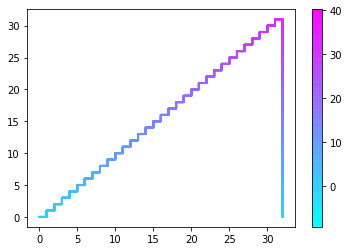

In [ ]:
#collapse-hide

X_1 = torch.arange(0,32)
info_1d(X_1, "X 1")
viz_1d( X_1 )

tensor     X 2 

    num. dims           1
    num. entries        32
    shape               [32]


    mean                0.4745957
    std                 0.3013748


┌──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ 0.72 │ 0.16 │ 0.67 │ 0.64 │ 0.62 │ 0.73 │ 0.84 │ 0.11 │ 0.45 │ 0.43 │ 0.16 │ 0.24 │ 0.28 │ 0.12 │ 0.00 │ 0.42 │ 0.24 │ 0.71 │ 0.16 │ 0.95 │ 0.48 │ 0.29 │ 0.68 │ 0.99 │ 0.05 │ 0.72 │ 0.41 │ 0.13 │ 0.06 │ 0.81 │ 0.96 │ 0.80 │
└──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┘





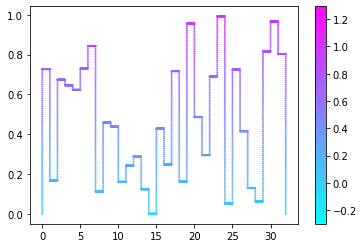

In [ ]:
#collapse-hide

X_2 = torch.rand( (32) ) 
info_1d(X_2, "X 2")
viz_1d( X_2 )

tensor     X 3 

    num. dims           1
    num. entries        32
    shape               [32]


    mean                -0.0077615567
    std                 0.9509981


┌──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ -0.6 │ 0.96 │ -0.8 │ 0.02 │ -1.3 │ 0.65 │ 0.12 │ 2.20 │ -0.5 │ 0.21 │ -0.1 │ -1.1 │ -0.1 │ 1.12 │ -0.6 │ 0.08 │ -1.3 │ -1.3 │ 0.13 │ 1.74 │ 0.55 │ -1.4 │ -0.1 │ -0.7 │ 1.12 │ 0.66 │ 0.11 │ 1.60 │ 0.31 │ -1.2 │ -0.9 │ 0.52 │
└──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┘





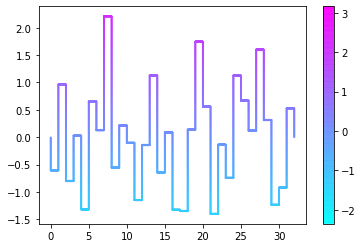

In [ ]:
#collapse-hide

X_3 = torch.randn( (32) )
info_1d(X_3, "X 3")
viz_1d( X_3 )

To apply `B_tilde` to these signals, we must augment each signal with batch and channel dimensions:

In [ ]:
#collapse-hide

X_1 = torch.as_tensor( X_1[ None, None, : ], dtype= torch.float32 )
X_2 = torch.as_tensor( X_2[ None, None, : ], dtype= torch.float32 )
X_3 = torch.as_tensor( X_3[ None, None, : ], dtype= torch.float32 )

Each output has shape

In [ ]:
#collapse-hide

Y_1 = B_tilde( X_1 ).detach()
Y_2 = B_tilde( X_2 ).detach()
Y_3 = B_tilde( X_3 ).detach()

print( np.array( Y_1.size() ) )

[ 1 16 14]


This is the output shape which we predicted: the last entry `14` (as of recent run) is the length $\tilde{n}$ of the output vector at each channel. The output has `16` channels, and our batch size $N$ remains `1`. 

The easiest way to visualize this output is to use `torch.squeeze`, which removes all dimensions of the input tensor of size one. The shape of each `Y_1`, `Y_2`, `Y_3` after this squeezing will be `[16,14]`.

In [ ]:
#collapse-hide

Y_1 = torch.squeeze(Y_1)
Y_2 = torch.squeeze(Y_2)
Y_3 = torch.squeeze(Y_3)

print( np.array( Y_1.size() ) )

[16 14]


visualizing `X_1`:

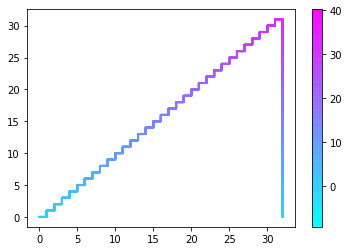

In [ ]:
# collapse-hide

viz_1d( torch.squeeze(X_1), colorbar = True )

visualizing `Y_1`

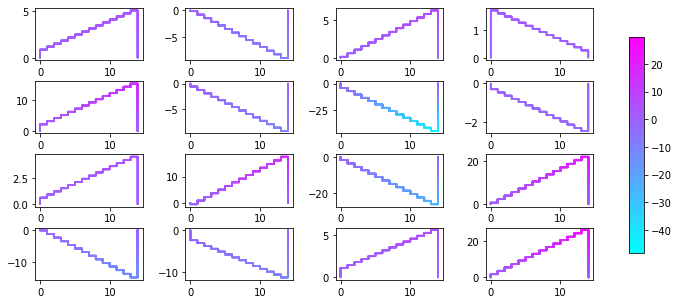

In [ ]:
# collapse-hide

Y_1_list = [ Y_1[j,:] for j in range(16) ]

viz_list_of_1d( Y_1_list )



`X_2`

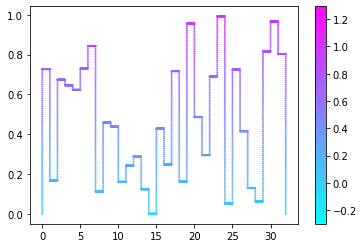

In [ ]:
# collapse-hide

viz_1d(torch.squeeze(X_2))

`Y_2`

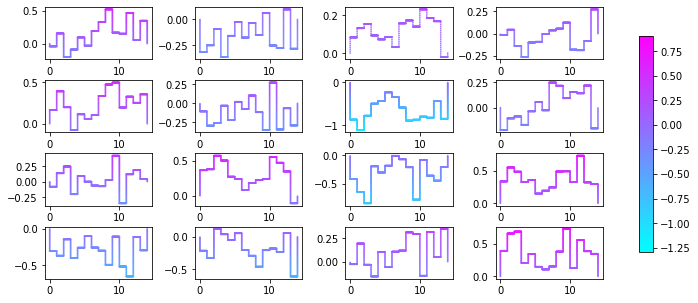

In [ ]:
# collapse-hide

Y_2_list = [ Y_2[j,:] for j in range(16) ]

list_Y_2 = [ tens[None,:] for tens in Y_2_list ]

viz_list_of_1d( Y_2_list )

`X_3`

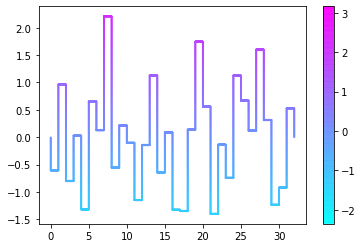

In [ ]:
# collapse-hide

viz_1d( torch.squeeze(X_3) )

`Y_3`

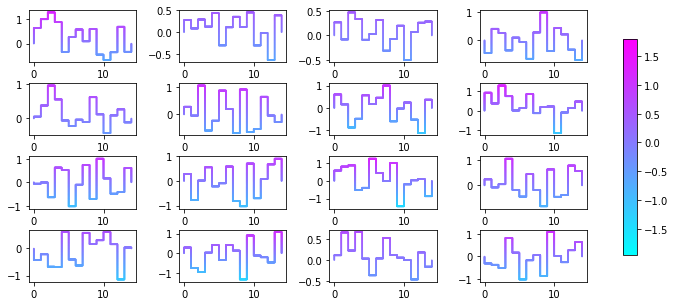

In [ ]:
# collapse-hide

Y_3_list = [ Y_3[j,:] for j in range(16) ]

viz_list_of_1d( Y_3_list )

___
___

It is also of interest to say something about the size and shape of the weight tensor $\tilde{\theta}$ that effectively constitutes the layer `B_tilde` $\equiv \tilde{B}$, having set the bias of this layer to be zero. 

In [ ]:
#collapse-hide

four_tuple_list = [ B_tilde.weight[j][0].detach() for j in range(16) ]
four_tuple_list_prime = [ B_tilde.weight[j].detach() for j in range(16) ]
weight_stack = torch.stack(four_tuple_list)

We can view this weight matrix as a grid of "images," each of which is effectively a $4$-tuple. 

In [ ]:
# collapse-hide

four_tuple_list_prime

[tensor([[-0.4263,  0.0067,  0.1164,  0.1192, -0.4339]]),
 tensor([[ 0.0573, -0.0107,  0.3462,  0.1495,  0.1983]]),
 tensor([[-0.3103,  0.3386,  0.0122, -0.0715, -0.0886]]),
 tensor([[ 0.1754, -0.2693, -0.3207, -0.1704,  0.4245]]),
 tensor([[ 0.2760, -0.2987, -0.3486,  0.3718, -0.1541]]),
 tensor([[ 0.3042, -0.1554,  0.0681, -0.3196, -0.0570]]),
 tensor([[ 0.1059, -0.1253,  0.4401, -0.4115,  0.2772]]),
 tensor([[-0.1306,  0.1273, -0.4381, -0.0177,  0.4324]]),
 tensor([[-0.3801, -0.4468, -0.0702, -0.2962,  0.2563]]),
 tensor([[-0.3563,  0.2352,  0.0296,  0.2618,  0.2206]]),
 tensor([[ 0.2666,  0.3872, -0.1945,  0.4311, -0.4195]]),
 tensor([[ 0.3487, -0.1798,  0.0364,  0.3259, -0.0139]]),
 tensor([[-0.2289,  0.2245, -0.3838,  0.0922,  0.0169]]),
 tensor([[-0.2160, -0.1962,  0.3556,  0.0952, -0.0446]]),
 tensor([[-0.2914, -0.0188,  0.1127, -0.4291, -0.0389]]),
 tensor([[-0.0729, -0.3516, -0.1568,  0.1510, -0.2799]])]

or as a single block, though we remark that this matrix should be regarded as a stack of length $5$ vectors, each of which corresponds to its own circulant matrix with shape is appropriate to the input and output size.

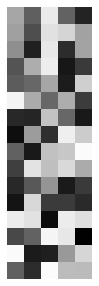

In [ ]:
#collapse-hide

viz_tens(weight_stack, display_size = 5)

___

__Rmk__ $\quad$ Notice that what we are seeing is essentially noise. Yes, two of the input signals were initialized randomly. Importantly, the weights in $\hat{\theta}$ have been initialized randomly as well. Referencing the [docs](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html) again, one sees that the weights are initialized as i.i.d. Uniform over the interval $[- \sqrt{ M / (n k) },  \sqrt{ M /(n k) }]$. The filters have not yet had a chance to have the patterns of signals imprint themselves through learning dynamics.
___

In light of the above remark, let us design a length $5$ filter by hand.

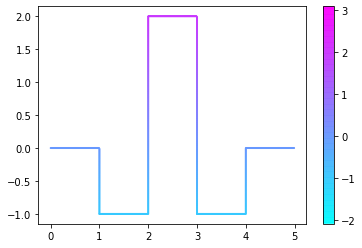

In [ ]:
filter = torch.tensor( [0, -1, 2, -1, 0] )
viz_1d(filter)

The point of this filter is to do some kind of edge detection, following examples given in pages like [this](https://deepai.org/machine-learning-glossary-and-terms/convolutional-neural-network), here we implement a simpler version in one dimension. Responses to [this](https://stackoverflow.com/questions/63441778/custom-weight-initiatlization-in-conv1d-pytorch) SO post were also helpful to look at.

Let us re-initialize `B_tilde`, now with only one output channel. This output will result from convolving our designed filter with input signals.  

In [ ]:
odcp = {} # one dimensional conv. parameters

odcp["in_size"] = 32
odcp["in_channels"] = 1
odcp["padding"] = 0
odcp["dilation"] = 1
odcp["kernel_size"] = 5
odcp["stride"] = 2
odcp["groups"] = 1
odcp["out_channels"] = 1

In [ ]:
B_tilde = Conv1d(in_channels = odcp["in_channels"],
                 out_channels = odcp["out_channels"],
                 kernel_size = odcp["kernel_size"],
                 stride = odcp["stride"],
                 padding = odcp["padding"],
                 dilation = odcp["dilation"],
                 groups = odcp["groups"],
                 bias = False
                )

B_tilde.weight

Parameter containing:
tensor([[[-0.2238, -0.1461,  0.0222, -0.1150,  0.3026]]], requires_grad=True)

To set these weights to `filter` in a direct fashion, we must first set the `requires_grad` attribute of the tensor to `False`. 

In [ ]:
#collapse-hide

B_tilde.weight.requires_grad = False

for j in range(5):
    B_tilde.weight[0][0][j] = filter[j]

B_tilde.weight

Parameter containing:
tensor([[[ 0., -1.,  2., -1.,  0.]]])

Let us redefine `Y_1`, `Y_2`, `Y_3` as the output of this new `B_tilde` acting on our three input signals. 

In [ ]:
#collapse-hide

Y_1 = B_tilde( X_1 ).detach()
Y_2 = B_tilde( X_2 ).detach()
Y_3 = B_tilde( X_3 ).detach()

print( np.array( Y_1.size() ) )

Y_1 = torch.squeeze(Y_1)
Y_2 = torch.squeeze(Y_2)
Y_3 = torch.squeeze(Y_3)

print( np.array( Y_1.size() ) )

[ 1  1 14]
[14]


`X_1`

In [ ]:
X_1

tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
          14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
          28., 29., 30., 31.]]])

tensor     X 1 

    num. dims           1
    num. entries        32
    shape               [32]


    mean                15.5
    std                 9.233092


┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ 0.0 │ 1.0 │ 2.0 │ 3.0 │ 4.0 │ 5.0 │ 6.0 │ 7.0 │ 8.0 │ 9.0 │ 10.0 │ 11.0 │ 12.0 │ 13.0 │ 14.0 │ 15.0 │ 16.0 │ 17.0 │ 18.0 │ 19.0 │ 20.0 │ 21.0 │ 22.0 │ 23.0 │ 24.0 │ 25.0 │ 26.0 │ 27.0 │ 28.0 │ 29.0 │ 30.0 │ 31.0 │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┘





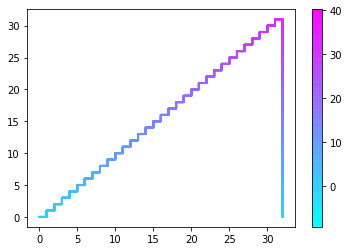

In [ ]:
#collapse-hide

info_1d(torch.squeeze(X_1), "X 1")

viz_1d(torch.squeeze(X_1) )

`Y_1`

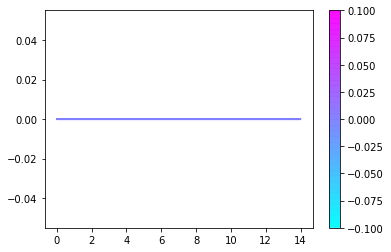

In [ ]:
#collapse-hide

viz_1d( Y_1 )

This is to be expected: the input signal is effectively a linear function, and our kernel effectively performs a discrete differentiation (and this is the motivation for edge detection -- derivatives detect edges). 

`X_2`

tensor     X 2 

    num. dims           1
    num. entries        32
    shape               [32]


    mean                0.4745957
    std                 0.3013748


┌──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ 0.72 │ 0.16 │ 0.67 │ 0.64 │ 0.62 │ 0.73 │ 0.84 │ 0.11 │ 0.45 │ 0.43 │ 0.16 │ 0.24 │ 0.28 │ 0.12 │ 0.00 │ 0.42 │ 0.24 │ 0.71 │ 0.16 │ 0.95 │ 0.48 │ 0.29 │ 0.68 │ 0.99 │ 0.05 │ 0.72 │ 0.41 │ 0.13 │ 0.06 │ 0.81 │ 0.96 │ 0.80 │
└──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┘





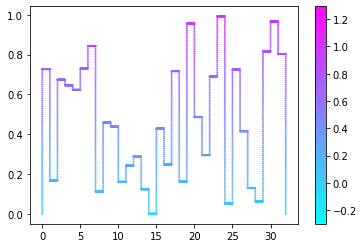

In [ ]:
#collapse-hide

info_1d(torch.squeeze(X_2), "X 2")

viz_1d(torch.squeeze(X_2))

`Y_2`

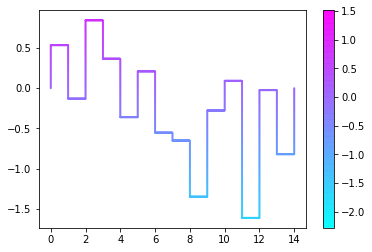

In [ ]:
#collapse-hide

viz_1d( Y_2 )

___

__Rmk__ $\quad$ The next thing to link up with is the description of generalized convolution from the first notebook. Recall that, in general, one has

$$
\tilde{\theta} \in \mathcal{X} ( H \backslash G / \tilde{H}, \mathcal{C} \otimes \tilde{\mathcal{C}} ),
$$

but let us reduce this further based on the assumptions made. Because $G \equiv \Omega \equiv C_n$, subgroup $H$ must be the trivial subgroup $\{ e \}$. Moreover, having assumed that $\dim{\mathcal{C}} = 1$, one also has $\mathcal{C} \otimes \tilde{\mathcal{C}} \cong \tilde{\mathcal{C}}$, so we may write

$$
\tilde{\theta} \in \mathcal{X} ( G / \tilde{H} , \tilde{\mathcal{C}} ),
$$

with $C_{\tilde{n}} \cong G / \tilde{H}$. Of course, as $14$ does not divide $32$, we cannot interpret this map as a group homomorphism, for instance, at least not in a direct fashion.
___

## <font color="CornflowerBlue">2.4 ... two-dimensional convolutions in torch</font>

____

#### `torch.nn.Conv2d`


The arguments:

* `in_channels`

* `out_channels`

* `kernel_size`

* `stride` $\quad$ controls the stride for the cross-correlation, a single number or a tuple. 

* `padding` $\quad$ controls amount of padding applied to the input. It can either be a string, `"valid"` or `"same"` or a tuple of ints giving the amount of implicit padding applied on both sides. 

* `dilation` $\quad$ controls the spacing between kernel points; "also known as the a trous algorithm

* `groups` $\quad$ controls connections between inputs and outputs. The `in_channels` and `out_channels` must be divisible by `groups`. For example,

    * At groups = 1, all inputs are convolved to all outputs

    * At groups = 2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels, and producing half the output channels, and both subsequently concatenated. 

    * At groups = `in_channels`, each input channel is convolved with its own set of filters (of size `out_channels // in_channels`)

* `bias`

* `padding_mode`,

* `device`,

* `dtype`

Let us now relate the shapes of the input and output to the parameters


| input parameter      | LaTeX symbol |
| ----------- | ----------- |
| `in_channels`      | $\text{dim}(\mathcal{C})$     |
| `out_channels`   | $\text{dim}(\mathcal{C}_1)$        |
| `kernel_size`      | $k$       |
| `stride`   | $\lambda$        |
| `padding`   | $\rho$        |
| `dilation`      | $\delta$       |
| `groups`   | $M$        



Additionally, we use $N$ for the batch size of the input, `N`. We also let $(h,w)$ denote the height-width pair describing the shape of the input signal domain. 

Correspondingly, we write $(h_1, w_1)$ for the height-width pair describing the shape of the output signal domain. 

We remark that the stride can be either integer or a $2$-tuple, whose coordinates describe the vertical and horizontal stride respectively. We still write $\lambda$ for the stride when it is a tuple, and use $\lambda_h \equiv \lambda[0]$ and $\lambda_w \equiv \lambda[1]$ to denote its first and second coordinate, in this case. Likewise, the padding and kernel size may be $2$-tuples as well, and we use similar notation to denote their entries.  

The full shape of the input to the layer includes the batch dimension, and is thus

$$
(N, \text{dim}(\mathcal{C}), H, W) \,,
$$

while the shape of the output is

$$
(N , \text{dim}(\mathcal{C}_1), H_1, W_1 )
$$

These shapes, in particular the spatial dimensions of each, are related as follows: 

$\begin{align}
H_1 &= \left\lfloor \frac{
    H + 2 \rho_h - \delta_h ( k_h -1) -1 }{\lambda_h}
\right\rfloor \\
W_1 &= \left\lfloor \frac{
    W + 2 \rho_w - \delta_w ( k_w -1) -1 }{\lambda_w}
\right\rfloor
\end{align}$,

in particular, the batch size does not have any bearing on how the shapes of tensors transform. 

The parameters to be learned are the weights $w^1$ and biases $b^1$. These are both `Tensor` objects, accessed from the layer as `Conv2d.weight` and `Conv2d.bias`. The shape of the weight tensor is

$$
\textrm{shape}(w^1) =
\left( \, \text{dim}(\mathcal{C}_1),  \, \text{dim}(\mathcal{C}) \big/ M , k_h, k_w \right)
$$

The tensor $w^1$ thus has 

$$
\textrm{size}(w^1) = \textrm{dim}(\mathcal{C}_1) \textrm{dim} (\mathcal{C}) k_h k_w \big/ M
$$

scalar entries. 

There is always the question of how to initialize weights. In the case of the `Conv2d` class, the weights are initialized to be i.i.d. $\text{Unif}( - \sqrt{ \alpha_1}, \sqrt{\alpha_1} )$ random variables, where

$$
\alpha_1 := \frac{ \textrm{dim}(\mathcal{C}_1) }{\textrm{size}(w^1)}
$$



The bias tensor is a much smaller object, we have 

$
\begin{align}
\textrm{shape}(b^1) = (\, \textrm{dim}(\mathcal{C}_1  ) \,) \, , \quad \textrm{size}(b^1) = \textrm{dim}(\mathcal{C}_1)
\end{align}
$

Despite this, we use the same initialization (with mutual independence of all random variables in discussion) for the bias entries as we did for the weights. 

## ... A simple CNN

We consider possibly the simplest neural network that we can construct through the above blueprint. Suppose we have a binary classification problem, with the following hypothesis space. Let $\textsf{H}_1$ denote the hypothesis space of functions $f : \mathcal{X}( C_n, \mathbb{R}) \to \{0,1\}$ of the form 

$$
f = A \circ P \circ \mathbf{a} \circ B \,,
$$
where the components of $f$ are 

where the components of $f$ are 


* $B$  : $\quad$ A $C_n$-equivariant function, to be learned. It is represented as a circulant matrix $\mathbf{C}(\theta)$, where $\theta$ is a vector $\theta \equiv (\theta_0, \dots, \theta_{n-1})$ whose entries $\theta_j$ are parameters to be learned. 

* $ \mathbf{a} $ : $\quad$ We consider the ReLU activation function, $a : \mathbb{R} \to \mathbb{R}_{\geq\, 0}$ defined by $a(w) = \max(0,w)$, for $w \in \mathbb{R}$. The bold-face $\mathbf{a}$ denotes the entry-wise action of this function on a given vector;for $y \equiv (\,y_1, \,\dots, \, y_n \, ) \in \mathcal{X}(C_n, \mathbb{R})$, which we imagine as the output of $B(x)$ for some input signal $x$, we have $\mathbf{a} (y ) = ( \,  \max(0,y_1), \,  \dots, \, \max(0,y_n) )$. There are no learned parameters in this layer. 

* $P$ : $\quad$ A coarsening operator. In this case, let us say it is a _zero-padded group homomorphism_. 

 $P : C_n \to C_{n / d }$ for some divisor $d \mid n$ \footnote{zero-padding} , and let us say that it operates through max-pooling on the signal, over the pre-images of each element of $C_{n / d}$. 

* $A$ : $\quad$ A global-pooling layer. We assume this has the form of a fully-connected layer, followed by a softmax. Specifically,